<a href="https://colab.research.google.com/github/poltergeistjoya/Freq_Linear_Reg/blob/main/freqml_proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Organize and scale prostate cancer data 

# Read data in from the txt file
df = pd.read_csv('prostatedata.txt', delimiter = "\t")

# Pad first column with 1's 
df.insert(0, 'intercept', 1)

# Separate into inputs and outputs 
X_features = pd.DataFrame(df, columns = ['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45'])
X = pd.DataFrame(df, columns = ['intercept', 'lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45'])
y = pd.DataFrame(df, columns = ['lpsa'])

# Scale features -- standard scaling 
ss = StandardScaler()
data_scaled = ss.fit_transform(X)

# Split data into 80% train, 10% validate, 10% train 
train_x, rest_x, train_y, rest_y = train_test_split(X, y, test_size = 0.2) 
val_x, test_x, val_y, test_y = train_test_split(rest_x, rest_y, test_size = 0.5)

# Convert to Numpy arrays
train_x = train_x.to_numpy() 
test_x = test_x.to_numpy()
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()
val_x = val_x.to_numpy()
val_y = val_y.to_numpy()
print('val_x', val_x, 'val_y', val_y)

val_x [[  1.           1.99741771   3.719651    63.           1.61938824
    1.           1.9095425    7.          40.        ]
 [  1.           1.78170913   3.451574    63.           0.43825493
    0.           1.178655     7.          60.        ]
 [  1.           0.18232156   3.804438    65.           1.70474809
    0.          -1.38629436   6.           0.        ]
 [  1.           2.12704052   4.121473    68.           1.76644166
    0.           1.44691898   7.          40.        ]
 [  1.           1.22082992   3.568123    70.           1.37371558
    0.          -0.7985077    6.           0.        ]
 [  1.           3.24649099   4.101817    68.          -1.38629436
    0.          -1.38629436   6.           0.        ]
 [  1.           1.44220199   3.68261     68.          -1.38629436
    0.          -1.38629436   7.          10.        ]
 [  1.           2.72785283   3.995445    79.           1.87946505
    1.           2.65675691   9.         100.        ]
 [  1.          -0

In [ ]:
#Functions 

# Might combine all of them together for plain linear regression...

# Find betas (weights)
def train_data(X, y):
  beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y # eq 3.6
  return beta_hat

# Use betas to test data output 
def test_data(X, beta_hat): 
  y_hat = X @ beta_hat # eq 3.7
  return y_hat

# Get MSE (mean squared error)
def get_MSE(y, y_hat):
  diff_y = np.square(y-y_hat)
  mse = (np.sum(diff_y))/len(y) 
  return mse 

# Estimate var_hat 
def est_var_hat(y, y_hat, X):
  diff_y = np.square(y-y_hat)
  var_hat = (np.sum(diff_y))/(len(y)-len(X[0]) - 1 - 1) # eq 3.8
  return var_hat

# Get standard errors
def get_std_errors(var_hat, diag_vals): 
   std_errs = np.sqrt(var_hat) * np.sqrt(diag_vals) # eq 3.12
   return std_errs

# Get Z-scores 
def get_z_scores(beta_hat, std_errs):
  z_scores = np.zeros(len(beta_hat))
  for j in range(len(beta_hat)): # eq 3.12
    z_scores[j] = beta_hat[j]/std_errs[j]
    return z_scores

a) Plain old linear regression, with no regularization. You must code this one by hand (i.e use equation 3.6 to find the betas).  Report the mean squared error on the test dataset. Replicate tables 3.1 and 3.2. You will not need the validation set for this part of the assigment.

In [ ]:
#1) Linear regression 

beta_hat = train_data(train_x, train_y)
y_hat = test_data(test_x, beta_hat)
mse = get_MSE(test_y, y_hat)

print("Mean squared error: ", mse)

# Get correlation coefficients

corr_coeffs = np.corrcoef(X_features.T); 

# Table 3.1 with correlations 

table1_data = {' ': ['lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'],\
     'lcavol': [corr_coeffs[0,1], corr_coeffs[0,2], corr_coeffs[0,3], corr_coeffs[0,4], corr_coeffs[0,5], corr_coeffs[0,6], corr_coeffs[0,7]],\
     'lweight': [' ', corr_coeffs[1,2], corr_coeffs[1,3], corr_coeffs[1,4], corr_coeffs[1,5], corr_coeffs[1,6], corr_coeffs[1,7]],\
     'age': [' ', ' ', corr_coeffs[2,3], corr_coeffs[2,4], corr_coeffs[2,5], corr_coeffs[2,6], corr_coeffs[2,7]],\
     'lbph': [' ', ' ', ' ', corr_coeffs[3,4], corr_coeffs[3,5], corr_coeffs[3,6], corr_coeffs[3,7]],\
     'svi': [' ', ' ', ' ', ' ', corr_coeffs[4,5], corr_coeffs[4,6], corr_coeffs[4,7]],\
     'lcp': [' ', ' ', ' ', ' ', ' ', corr_coeffs[5,6], corr_coeffs[5,7]],\
     'gleason': [' ', ' ', ' ', ' ', ' ', ' ', corr_coeffs[6,7]]\
     }

table1 = pd.DataFrame(data=table1_data)
table1

Mean squared error:  0.22947679456325099


,,lcavol,lweight,age,lbph,svi,lcp,gleason
0,lweight,0.280521,,,,,,
1,age,0.225000,0.347969,,,,,
2,lbph,0.027350,0.442264,0.350186,,,,
3,svi,0.538845,0.155385,0.117658,-0.085843,,,
4,lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,,
5,gleason,0.432417,0.056882,0.268892,0.07782,0.320412,0.51483,
6,pgg45,0.433652,0.107354,0.276112,0.07846,0.457648,0.631528,0.751905


In [ ]:
# Std errors and Z scores

# do we use train or test for this? 
var_hat = est_var_hat(train_y, y_hat, train_x) 
diag_vals = np.diagonal(np.linalg.inv(train_x.T @ train_x))
std_errs = get_std_errors(var_hat, diag_vals)
z_scores = get_z_scores(beta_hat, std_errs) 

# Table 3.2 with beta_hat, std_errs, z_scores

table2_data = {'Term': ['intercept', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'],\
      'Coefficient': [beta_hat[0], beta_hat[1], beta_hat[2], beta_hat[3], beta_hat[4], beta_hat[5], beta_hat[6], beta_hat[7], beta_hat[8]],\
      'Std. Error': [std_errs[0], std_errs[1], std_errs[2], std_errs[3], std_errs[4], std_errs[5], std_errs[6], std_errs[7], std_errs[8]],\
      'Z Score': [z_scores[0], z_scores[1], z_scores[2], z_scores[3], z_scores[4], z_scores[5], z_scores[6], z_scores[7], z_scores[8]]\
     }

table2 = pd.DataFrame(data=table2_data)
table2

ValueError: ignored

Correlation stuff: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html 

In [ ]:
test_matrix = np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(test_matrix) 

print(test_matrix[1])

##Ridge Regression

Beta and y_hat functions, MSE should be same as in plain linear regression

In [ ]:
def get_b_ridge(X, lamb, y):
  #I is the pxp identity matrix
  #as lambda increases, b_hat gets smaller
  b_hat_ridge = np.linalg.inv(X.T @ X + lamb * np.identity(X.shape[1])) @ X.T @ y # eq 3.44
  #above func penalizes b_0 in identity, but we get b_0 (y-int) like so
  b_0 = np.mean(y) #pg 64
  return b_0, b_hat_ridge

def get_y_hat_ridge(b_0, b_hat_ridge, X):
  y_hat_ridge = b_0 + X @ b_hat_ridge
  return y_hat_ridge


In [142]:
n_ridge =1000
# lambs = np.linspace(0,50000000000000000000000000,n_ridge)
lambs = np.linspace(0.0001, 5, n_ridge )
b_hats = np.zeros((n_ridge,8))
error = []
#will sweep lambda to find the optimal value that fits data purrfectly,,, how to vectorize?
for i, lamb in enumerate(lambs):
    b_0, b_hat_ridge = get_b_ridge(train_x[:, 1:], lamb, train_y)
    b_hats[i,:] = b_hat_ridge.T
    #print(b_hats, np.shape(b_hats))
    y_hat_ridge = get_y_hat_ridge(b_0, b_hat_ridge, val_x[:, 1:])
    mse = get_MSE(val_y, y_hat_ridge)
    error.append(mse)

min_mse = min(error)
min_mse_ind = error.index(min_mse)
op_lamb = lambs[min_mse_ind]
print(min_mse, op_lamb)

#print(error)

5.236685482600758 3.5285579579579585


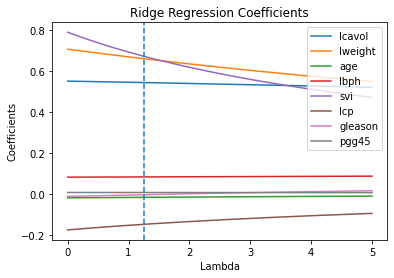

In [143]:
#Plot a ridge plot similar to figure 3.8, but you can just sweep the lambda parameter (you don't have to scale it to degrees of freedom).
fig, ax = plt.subplots(1,1)
for i in range (0,8):
  ax.plot(lambs, b_hats[:,i])
ax.legend(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'])
ax.axvline(np.log(op_lamb), ls = "--")
ax.set_xlabel('Lambda')
ax.set_ylabel('Coefficients')
ax.set_title('Ridge Regression Coefficients')
plt.show()